<a href="https://colab.research.google.com/github/AmmarMalik93/MachineLearningSabKayLiey/blob/master/Logistic_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression using Tensorflow(Keras)


Load required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load and Normalize MNIST dataset

In [2]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train/255.0 # Normalizing between 0 and 1
X_test = X_test/255.0 # Normalizing between 0 and 1


print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Lets Display some images

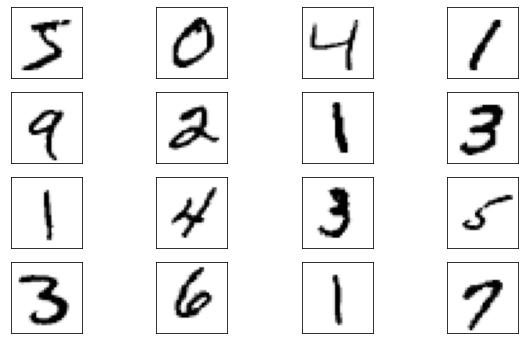

In [3]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
i = 0
for ax in axs.flat:
  ax.imshow(X_train[i,:,:], cmap='Greys')
  i += 1

Now reshape the digits to vectors

In [4]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

print("New X_train shape", X_train.shape)
print("New X_test shape", X_test.shape)


New X_train shape (60000, 784)
New X_test shape (10000, 784)


# Binary Classification

Lets try to classify only digits 0 and 1

In [0]:
y_tr = y_train[(y_train==0) | (y_train==1)]
y_ts = y_test[(y_test==0) | (y_test==1)]
X_tr = X_train[(y_train==0) | (y_train==1),:]
X_ts = X_test[(y_test==0) | (y_test==1),:]

Now lets create and fit the model to the above data.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(1, activation='sigmoid',input_dim=X_tr.shape[1]))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_tr, y_tr, epochs = 10, verbose = 1, validation_data=(X_ts, y_ts))

Epoch 1/10
396/396 [==============================] - 1s 2ms/step - loss: 0.1268 - accuracy: 0.9786 - val_loss: 0.0369 - val_accuracy: 0.9986
Epoch 2/10
396/396 [==============================] - 1s 1ms/step - loss: 0.0342 - accuracy: 0.9964 - val_loss: 0.0209 - val_accuracy: 0.9986
Epoch 3/10
396/396 [==============================] - 1s 1ms/step - loss: 0.0237 - accuracy: 0.9972 - val_loss: 0.0152 - val_accuracy: 0.9991
Epoch 4/10
396/396 [==============================] - 1s 1ms/step - loss: 0.0190 - accuracy: 0.9973 - val_loss: 0.0122 - val_accuracy: 0.9991
Epoch 5/10
396/396 [==============================] - 1s 2ms/step - loss: 0.0163 - accuracy: 0.9975 - val_loss: 0.0104 - val_accuracy: 0.9991
Epoch 6/10
396/396 [==============================] - 1s 1ms/step - loss: 0.0144 - accuracy: 0.9976 - val_loss: 0.0091 - val_accuracy: 0.9991
Epoch 7/10
396/396 [==============================] - 1s 1ms/step - loss: 0.0131 - accuracy: 0.9976 - val_loss: 0.0082 - val_accuracy: 0.9995
Epoch 

# Multiclass Classification
Lets try to classify all digits now.

In [8]:
from tensorflow.keras.utils import to_categorical
num_class = 10
Y_train = to_categorical(y_train, num_class) 
Y_test = to_categorical(y_test, num_class)

print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Now lets create a second model. In this model we will have 10 outputs (1 for each class). The class with the highest probablity is selected as prediction. *binary_crossentropy* is changed to *categorical_crossentropy* because now it is a multiclass problem. *sigmoid* is changed to *softmax* for the same reason. 

In [9]:
model2 = keras.Sequential()
model2.add(layers.Dense(num_class, activation='softmax',input_dim=X_tr.shape[1]))
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
history2 = model2.fit(X_train, Y_train, epochs = 10, verbose = 1, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7736 - accuracy: 0.8139 - val_loss: 0.4785 - val_accuracy: 0.8823
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4562 - accuracy: 0.8805 - val_loss: 0.3990 - val_accuracy: 0.8952
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4035 - accuracy: 0.8912 - val_loss: 0.3675 - val_accuracy: 0.9015
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3771 - accuracy: 0.8973 - val_loss: 0.3478 - val_accuracy: 0.9053
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3602 - accuracy: 0.9011 - val_loss: 0.3349 - val_accuracy: 0.9087
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3485 - accuracy: 0.9036 - val_loss: 0.3262 - val_accuracy: 0.9101
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3394 - accuracy: 0.9059 - val_loss: 0.3195 - val_accuracy:

Now first lets try to plot the performance of the model.

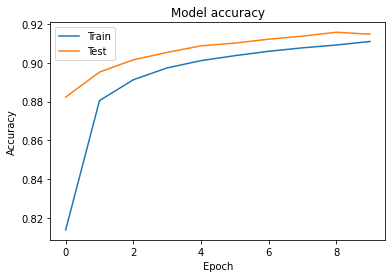

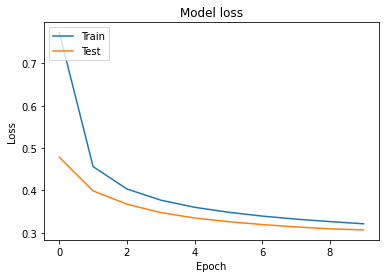

In [12]:
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Now let us plot the **Confusion Matrix**.

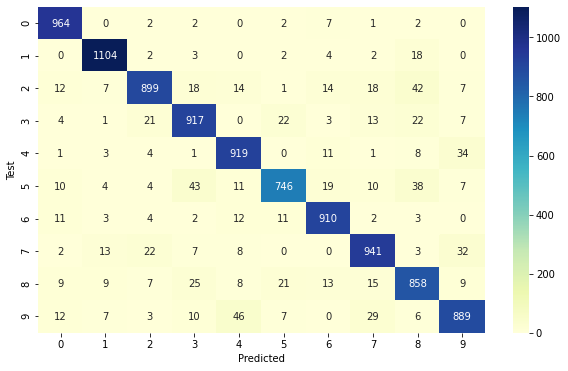

In [13]:
Y_Pred = np.argmax(model2.predict(X_test), axis=-1)
df = pd.DataFrame([y_test,Y_Pred]).T
df.columns = ['Test','Predicted']
confusion_matrix = pd.crosstab(df['Test'], df['Predicted'], rownames=['Test'], colnames=['Predicted'])

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap="YlGnBu")
plt.show()

Finally plot some of the misclassified digits.

In [0]:
missed = np.where(y_test != Y_Pred)[0] # indices of miss classified imaged

missed_imgs = X_test[missed,:].reshape(-1,28,28) # missed images from test dataset
missed_true = y_test[missed] # true labels of missed images
missed_pred = Y_Pred[missed] # predicted labels of missed images

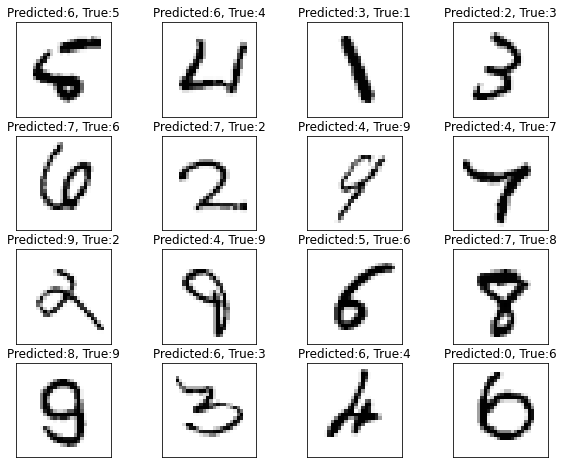

In [15]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
i = 0
for ax in axs.flat:
  ax.imshow(missed_imgs[i,:,:], cmap='Greys')
  ax.set_title('Predicted:%d, True:%d'%(missed_pred[i],missed_true[i]))
  i += 1